# 8. Gyakorlat - 1 DoF gerjesztett, csillapított lengőkar
2021.03.29

## Feladat:

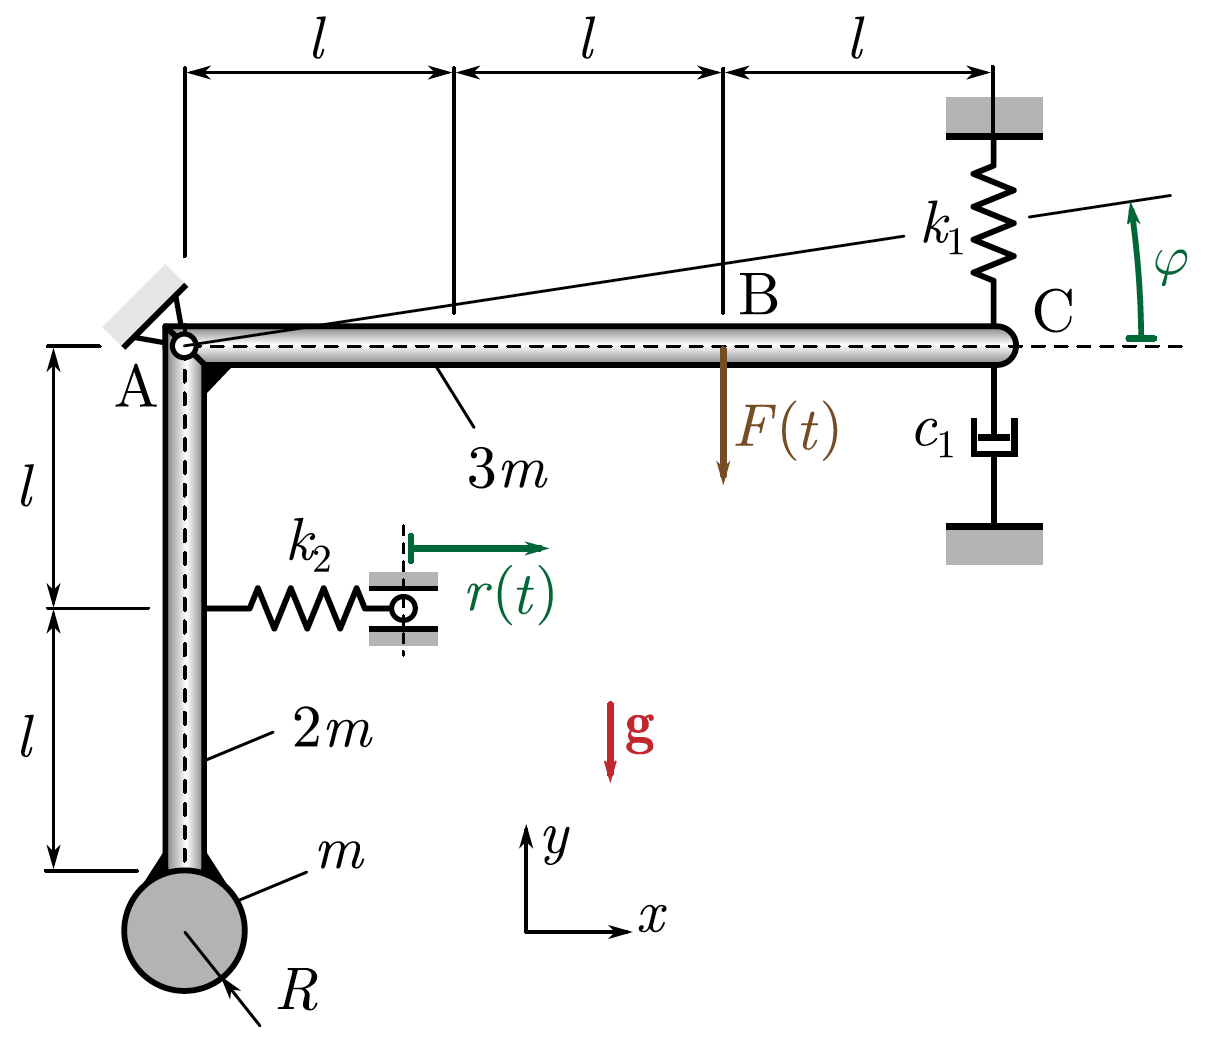

In [13]:
from IPython.display import Image
Image(filename='gyak8_1.png',width=500)

A mellékelt ábrán különböző méretű és tömegű rudakból és egy korongból összehegesztett szerkezet látható, mely csak az A csukló körüli szögelfordulásra képes. A környezet és a  vízszintes rúd közötti összeköttetést egy $k_1$ rugómerevségű rugó, és egy $c_1$ csillapítási tényezőjű csillapítás biztosítja, továbbá a B pontban egy harmonikus erőgerjesztés hat. A függőleges rúdon a $k_2$ rugómerevségű rugón kersztül egy harmonikus útgerjesztést alkalmazunk. A szerkezet vízszinteshez képesti elfordulását a $\varphi$ általánosított koordináta írja le. A gravitációs mezőben elhelyezkedő rendszer egyensúlyi helyzete a $\varphi = 0$ helyen található, ahol csak a $k_1$ rugómerevségű rugó statikus deformációja nem zérus. 


### Adatok:

|                              |                        |                        |
|:-----------------------------|:-----------------------|:-----------------------|
| $m$ = 0.12 kg                | $l$ = 0.2 m            | $R$ = 0.1 m            |
| $r(t)$ = $r_0$$\sin(\omega t)$ | $r_0$ = 0.01 m         | $\omega$ = 20 rad/s    |
| $F(t)$ = $F_0$$\sin(\omega t)$ | $F_0$ = 2 N            | $c_1$ = 2 Ns/m         |
| $k_1$ = 300 N/m              | $k_2$ = 10 N/m         | $g$ = 9.81 m/s^2       |

### Részfeladatok:
1. Vezesse le a mozgásegyenletet az egyensúlyi helyzet körül végzett kis kitérések esetén a másodfajú Lagrange-egyenlettel! Számítsa ki a csillapítatlan, valamint a csillapított rendszer sajátkörfrekvenciáját, a relatív csillapítási tényezőt, és a statikus kitérést!
2. Határozza meg a rendszer stacionárius megoldását (mozgástörvényét).

## Megoldás:

### 1. Feladat

Mivel a rendszer 1 szabadságfokú, és általánosított koordinátája $\varphi$, ezért a másodfajú Lagrange-egyenlet alakja:

$$\frac{\mathrm d}{\mathrm dt}\frac{\partial T}{\partial \dot\varphi}-\frac{\partial T}{\partial \varphi} + \frac{\partial \mathcal D}{\partial \dot\varphi} + \frac{\partial U}{\partial \varphi} = Q^\star.$$

Itt $T$ a kinetikus energia, $\mathcal D$ a Rayleigh-féle disszipatív potenciál, $U$ a potenciálfüggvény, valamint $Q^\star$ az általános erő.

In [2]:
# A következőkben a feladat az lesz, hogy ezen kifejezéseket 
# szimbolikusan meghatározzuk, majd a megfelelő deriválásokat
# elvégezve előáll a mozgásegyenlet.

import sympy as sp
from IPython.display import Math # hogy tudjunk LaTeX szöveget kiírni
sp.init_printing()

t, m, l, R, c, k1, k2, ω, r0, F0, g = sp.symbols('t, m, l, R, c, k_1, k_2, ω, r_0, F0, g')
φ = sp.Function('φ')(t)

# Készítsünk behelyettesítési listát az adatok alapján, SI-ben:
adatok = [(m, 0.12), (l, 0.2), (R, 0.1), (r0, 0.01), (ω, 20), 
          (k1, 300), (k2, 10), (c, 2), (F0, 2), (g, 9.81)]


In [3]:
## A kinetikus energia 

# Ha nem akarunk csúnya tizedes törteket a szimbolikus
# kifejezésünkbe, használjuk az `sp.Rational`-t.
θ_A = (sp.Rational(1,3) * 3*m * (3*l)**2   
       + sp.Rational(1,3) * 2*m * (2*l)**2
       + sp.Rational(1,2) * m * R**2
       + m * (2*l + R)**2)

T = sp.Rational(1,2)*θ_A*φ.diff(t)**2  

display(Math('T = {}'.format(sp.latex(T))))

<IPython.core.display.Math object>

In [4]:
## A disszipatív potenciál

# Mivel a linearizált mozgásegyenletet szeretnénk meghatározni, ezért a csillapító elem
# deformációs sebességét közelíthetjük annak lineáris megfelelőjével:

D = sp.Rational(1,2) * c * (3*l * φ.diff(t))**2

display(Math('\mathcal{{D}} = {}'.format(sp.latex(D))))

<IPython.core.display.Math object>

In [5]:
## A potenciális energia

# A potenciális energia a rugókban felhalmozódó potenciális energia
# és a gravitációs erő potenciális energiájából tevődik össze.

Δst_sym = sp.Symbol('Δ_st')
r = r0*sp.sin(ω*t)
U_r1 = sp.Rational(1,2) * k1 * (Δst_sym + 3*l*φ)**2  # a `k1` rugómervevségű rugó, linearizálva!
U_r2 = sp.Rational(1,2) * k2 * (r - l*φ)**2      # a `k2` rugómervevségű rugó, linearizálva!

U_frud = -2*m * g * l*sp.cos(φ)  # függőleges rúd, ezt nem szabad még linearizálni!
U_vrud = 3*m * g * sp.Rational(3,2)*l*sp.sin(φ) 
U_kor = -m * g * (2*l + R)*sp.cos(φ)  # korong

In [6]:
# `Δst` még ismeretlen. Ez a `k1` rugó statikus deformációja, mely meghatározható az egyensúlyi
# helyzetben felvett szabadtest ábra segítségével, a `A` pontra felírt nyomatéki egyensúlyból.

egyens_egyenl = k1*Δst_sym * 3*l - 3*m * g * sp.Rational(3,2)*l  # egy oldalra rendezve, a jobb oldal = 0
Δst = sp.solve(egyens_egyenl,Δst_sym)[0]

# Mivel ez a kitérés ellentétes irányú (meg van nyúlva a rugó) az általánosított koordináta pozitív irányával
# `Δst` mínusz egyszeresét kell venni. 
Δst = -Δst
display(Math('\Delta_{{st}}  = {}'.format(sp.latex(Δst))))

<IPython.core.display.Math object>

In [7]:
U = U_r1.subs(Δst_sym,Δst) + U_r2 + U_frud + U_vrud + U_kor
U = U.simplify()
display(Math('U  = {}'.format(sp.latex(U))))

<IPython.core.display.Math object>

In [8]:
## Az általános erő

F = F0*sp.sin(ω*t)

# Az általános erő a teljesítményből számítható

F_vect = sp.Matrix([[0],[-F]])

# A `B` pont helyvektora
rB_vect = sp.Matrix([[2*l*sp.cos(φ)],[2*l*sp.sin(φ)]])
vB_vect = rB_vect.diff(t)

# Az F erő teljesítménye
P = F_vect.dot(vB_vect) # skaláris szorzás, aka. dot product
display(Math('P  = {}'.format(sp.latex(P))))

# Ebből `Q*` az általánosított sebesség együtthatója
Q = P.coeff(φ.diff(t))
Q = Q.subs(sp.cos(φ),1) # linearizáljunk

display(Math('Q^\star = {}'.format(sp.latex(Q))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

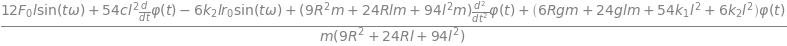

In [9]:
## A mozgásegyenlet, egy oldalra rendezve

eom = (T.diff(φ.diff(t))).diff(t) - T.diff(φ) + D.diff(φ.diff(t)) + U.diff(φ) - Q
eom = eom.subs([(sp.sin(φ),φ),(sp.cos(φ),1)]) # linearizálás
eom = eom.expand().collect(φ)  # kis rendezés
eom = (eom/eom.coeff(φ.diff(t,2))).expand() # leosztás a főegyütthatóval és rendezés

# Egyelőre nem találtam módját, hogy a sympy szépen kezelje a mozgásegyenlet kiíratását, ez a legjobb
# amire jutottam (egy oldalra rendezve)
eom.simplify().collect(φ)

In [10]:
# A csillapítási tényező, a körfrekvenciák, és a statikus kitérés számolása:

ζ_sym, ωn_sym, f0_sym, ωd_sym = sp.symbols('ζ, ω_n, f_0, ω_d')

φd_coeff = sp.Eq(eom.coeff(φ.diff(t)),2*ζ_sym*ωn_sym)
φ_coeff = sp.Eq(eom.coeff(φ),ωn_sym**2)
sin_coeff = sp.Eq(-eom.coeff(sp.sin(ω*t)),f0_sym*ωn_sym**2) # kell a `-` jel, mert Q-t áthoztuk a bal oldalra!
ωd_egyenl = sp.Eq(ωn_sym*sp.sqrt(1-ζ_sym**2),ωd_sym)


# Futásidő szempontjából ez nem optimális, mert így egy nemlineáris 4 ismeretlenes
# egyenletrendszert kell megoldania a gépnek. Érdemesebb egyesével megoldani ezt, 
# kezdve pl. `ωn` kifejezésével. Így viszont kompaktabb.
megold = sp.solve([φd_coeff,φ_coeff,sin_coeff,ωd_egyenl]
                  ,ωn_sym,ζ_sym,f0_sym,ωd_sym)[1] # megoldjuk az egyenletrendszert
                                                  # és a megoldásokból vesszük az 1.
                                                  # indexet, amik a pozitív megoldások 

# minden megoldásba behelyetesítünk, és kiértékeljük        
num_megold = [elem.subs(adatok).evalf(4) for elem in megold]  # list comprehension
display(num_megold)

In [11]:
# Az eredmények kiíratása:
display(Math('\omega_n = {}\ \\text{{rad/s}}'.format(num_megold[0])))
display(Math('\zeta = {}\ [1]'.format(num_megold[1])))
display(Math('\omega_d = {}\ \\text{{rad/s}}'.format(num_megold[3])))
display(Math('f_0 = {}\ \\text{{rad}}'.format(num_megold[2])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 2. Feladat

A stacionárius megoldást az alábbi formában keressük:

$$\varphi_p(t) = \Phi\sin(\omega t - \vartheta).$$

In [12]:
λ = (ω/num_megold[0]).subs(adatok) # frekvencia hányados
N = 1 / sp.sqrt( (1 - λ**2)**2 + 4 * num_megold[1]**2 * λ**2 )

# ezekből

Φ = N*num_megold[2]
ϑ = sp.atan((2*num_megold[1]*λ/(1-λ**2)))

display(Math('\Phi = {}\ \\text{{rad}}'.format(Φ)))
display(Math('ϑ = {}\ \\text{{rad}}'.format(ϑ)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Készítette:

        Csuzdi Domonkos (Alkalmazott Mechanika Szakosztály)
        Takács Dénes (BME MM) ábrái és Berezvai Szabolcs (BME MM) kidolgozása alapján.

        Hibák, javaslatok:
        amsz.bme@gmail.com
        csuzdi02@gmail.com

        2021.03.29